In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
#count of quality feature
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

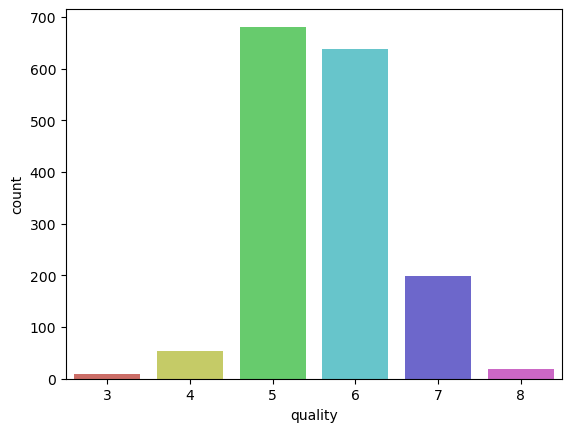

In [3]:
sns.countplot(x = df['quality'], palette= 'hls')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
# duplicates
df.duplicated().sum()

240

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

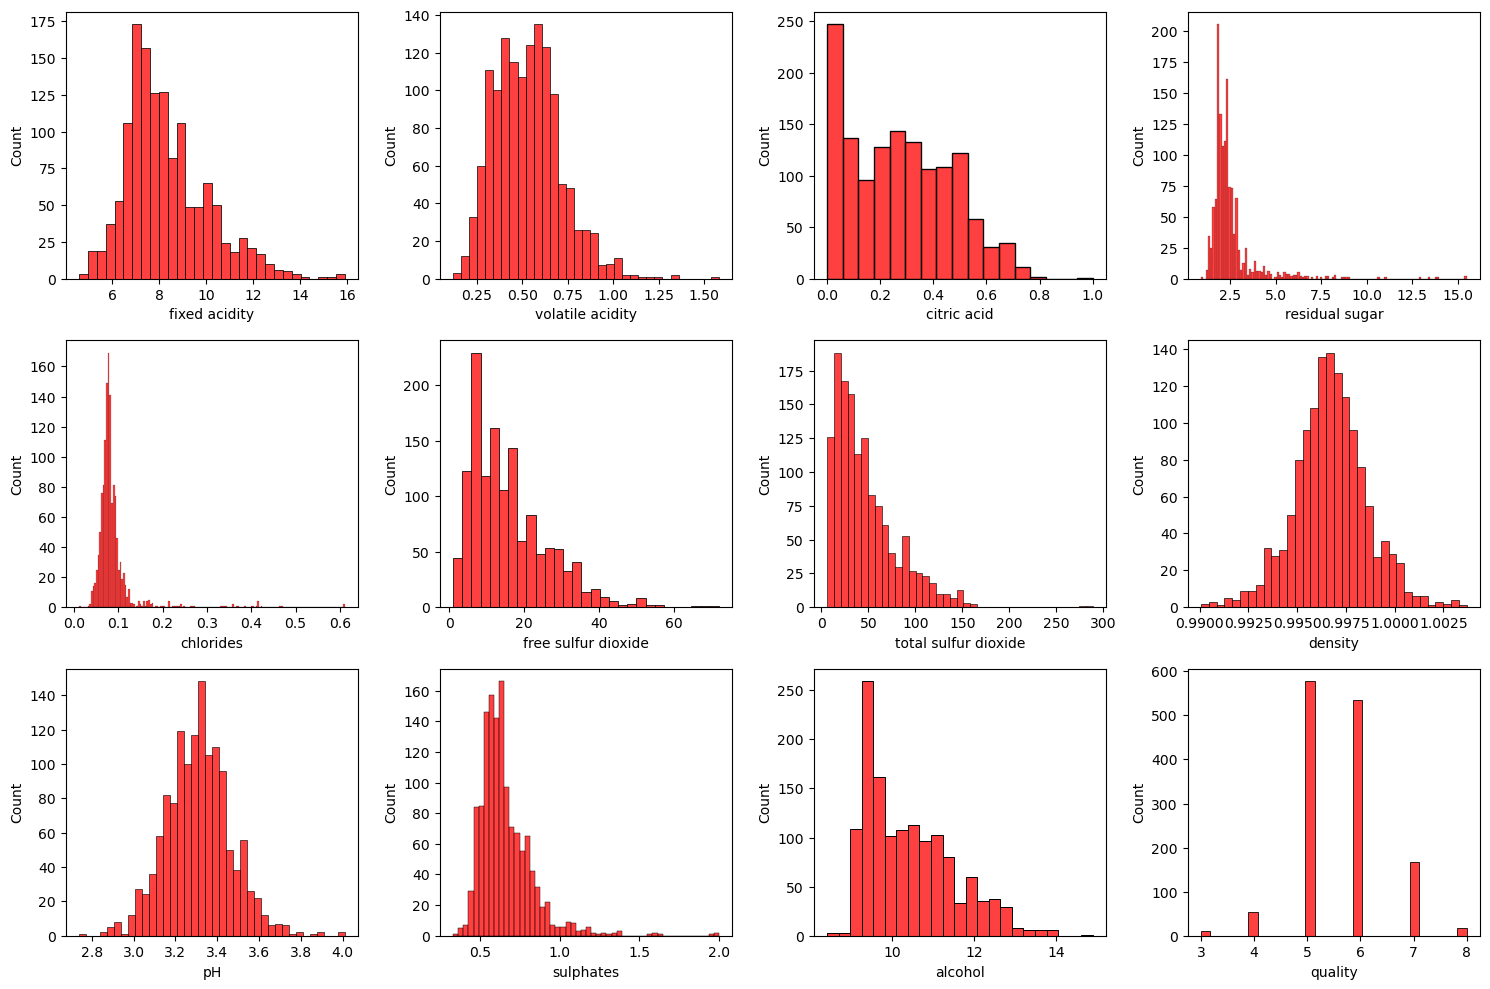

In [6]:
#plot the 3*4 subplot on the same figure
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (15,10))
k = 0
for i in range(3):
    for j in range(4):
            sns.histplot(df[df.columns[k]], ax = axes[i][j], color = 'red')
            k += 1
plt.tight_layout()
plt.show()

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# apply log transform on features
#df["volatile acidity"]=np.log(df["volatile acidity"])
#df["citric acid"]=np.log(df["citric acid"])
df["residual sugar"]=np.log(df["residual sugar"])
df["chlorides"]=np.log(df["chlorides"])
df["free sulfur dioxide"]=np.log(df["free sulfur dioxide"])
df["total sulfur dioxide"]=np.log(df["total sulfur dioxide"])
df["sulphates"]=np.log(df["sulphates"])
#df["alcohol"]=np.log(df["alcohol"])



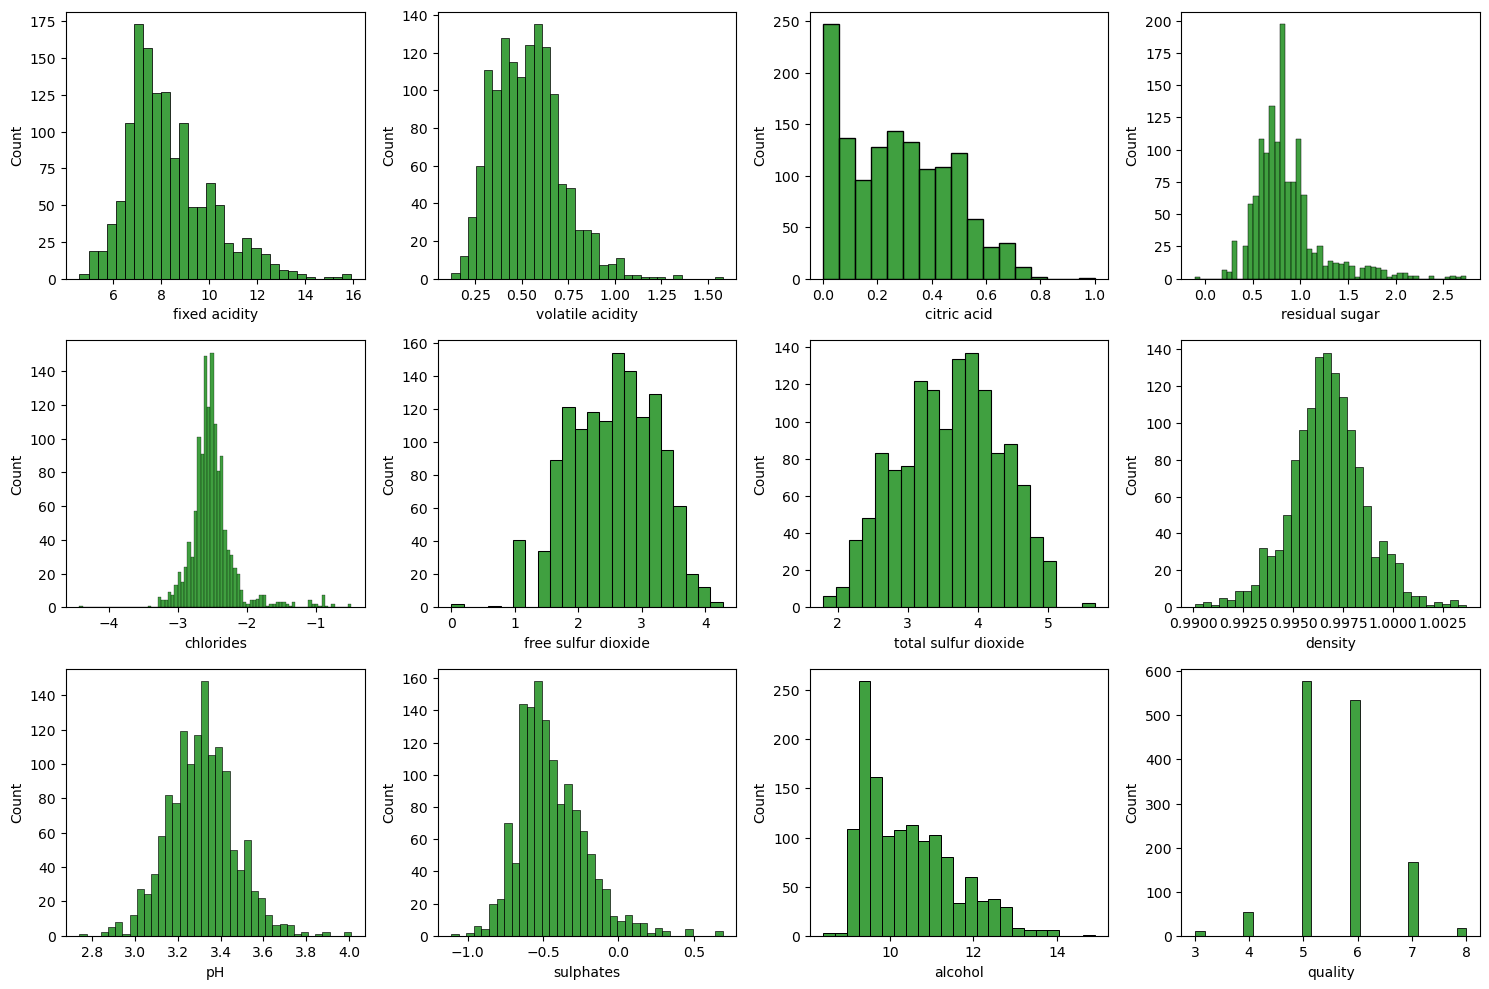

In [8]:
#plot the 3*4 subplot on the same figure
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (15,10))
k = 0
for i in range(3):
    for j in range(4):
            sns.histplot(df[df.columns[k]], ax = axes[i][j], color = 'green')
            k += 1
plt.tight_layout()
plt.show()

In [9]:
X = df.drop('quality',axis='columns')
y = df['quality']

In [10]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00        0.641854  -2.577022   
1            7.8              0.88         0.00        0.955511  -2.322788   
2            7.8              0.76         0.04        0.832909  -2.385967   
3           11.2              0.28         0.56        0.641854  -2.590267   
5            7.4              0.66         0.00        0.587787  -2.590267   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             2.397895              3.526361   0.9978  3.51  -0.579818   
1             3.218876              4.204693   0.9968  3.20  -0.385662   
2             2.708050              3.988984   0.9970  3.26  -0.430783   
3             2.833213              4.094345   0.9980  3.16  -0.544727   
5             2.564949              3.688879   0.9978  3.51  -0.579818   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
5      9.4

In [11]:
X.isnull().sum()   

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [12]:
y.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [13]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X.fillna(0), y)

  File "c:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\HP\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\HP\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [14]:
y.value_counts()

quality
5    577
6    577
7    577
4    577
8    577
3    577
Name: count, dtype: int64

In [32]:
X.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4086.000000       4086.000000  4086.000000     4086.000000   
mean        8.326707          0.589766     0.261858        0.871003   
std         1.711526          0.257386     0.205993        0.347856   
min         4.600000          0.120000     0.000000       -0.105361   
25%         7.132248          0.390000     0.050103        0.641854   
50%         7.900000          0.543509     0.250000        0.788457   
75%         9.400000          0.730000     0.444964        0.997023   
max        15.900000          1.580000     1.000000        2.740840   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4086.000000          4086.000000           4086.000000  4086.000000   
mean     -2.507323             2.341729              3.316216     0.996513   
std       0.308319             0.679457              0.694619     0.001867   
min      -4.422849             0.000000              1.791759     0.990070   
25%      -2.659786             1.777748              2.708050     0.995320   
50%      -2.550143             2.344247              3.284720     0.996527   
75%      -2.407946             2.838222              3.852171     0.997680   
max      -0.492658             4.276666              5.666427     1.003690   

                pH    sulphates      alcohol  
count  4086.000000  4086.000000  4086.000000  
mean      3.333961    -0.449954    10.730487  
std       0.154824     0.220154     1.161510  
min       2.740000    -1.108663     8.400000  
25%       3.226478    -0.616186     9.800000  
50%       3.330000    -0.471377    10.600000  
75%       3.440528    -0.292465    11.500000  
max       4.010000     0.693147    14.900000

In [15]:
# apply standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.head()

0         1         2         3         4         5         6   \
0 -0.514153  0.415735 -1.262072 -0.656964 -0.201035  0.040587  0.258873   
1 -0.273432  1.103481 -1.262072  0.220075  0.581554  1.266123  1.222161   
2 -0.273432  0.644984 -1.066367 -0.122742  0.387076  0.503577  0.915837   
3  1.772692 -1.189006  1.477800 -0.656964 -0.241807  0.690417  1.065457   
4 -0.514153  0.262902 -1.262072 -0.808145 -0.241807  0.289961  0.489663   

         7         8         9         10  
0  0.736860  1.141285 -0.590311 -1.155857  
1  0.206650 -0.885766  0.274267 -0.823148  
2  0.312692 -0.493433  0.073345 -0.823148  
3  0.842901 -1.147321 -0.434049 -0.823148  
4  0.736860  1.141285 -0.590311 -1.155857

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
y_test.value_counts()

quality
5    162
3    150
7    145
6    143
8    140
4    126
Name: count, dtype: int64

In [18]:
# Apply LogRegression

from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression()
model_LogReg.fit(X_train,y_train)
LogReg_acc=round(model_LogReg.score(X_test, y_test)*100)
LogReg_acc

60

In [19]:
# apply decision tree model
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
DT_acc=round(model_DT.score(X_test, y_test)*100)
DT_acc

73

In [20]:
#svm
from sklearn.svm import SVC
model_SVM = SVC()
model_SVM.fit(X_train,y_train)
SVM_acc=round(model_SVM.score(X_test, y_test)*100)
SVM_acc

77

In [21]:
#apply random forest model
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)
RF_acc=round(model_RF.score(X_test, y_test)*100)
RF_acc

82

In [44]:
Accuracy = [LogReg_acc, DT_acc, RF_acc, SVM_acc]
models = ['LogisticRegression', 'DecisionTreeClassifier' , 'RandomForestClassifier', 'Support Vector Machine']

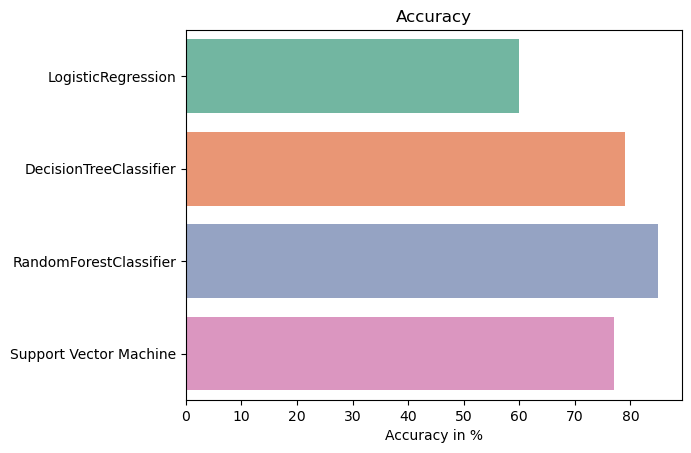

In [47]:
sns.barplot(x=Accuracy, y=models, palette="Set2")
plt.xlabel('Accuracy in %')
plt.title('Accuracy')
plt.show()

In [22]:
# get confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_RF.predict(X_test))
cm

array([[150,   0,   0,   0,   0,   0],
       [  0, 119,   7,   0,   0,   0],
       [  6,   9, 100,  42,   3,   2],
       [  2,   7,  39,  69,  20,   6],
       [  1,   2,   1,   5, 135,   1],
       [  0,   0,   0,   0,   2, 138]], dtype=int64)

In [25]:
y_test.value_counts()

quality
5    162
3    150
7    145
6    143
8    140
4    126
Name: count, dtype: int64

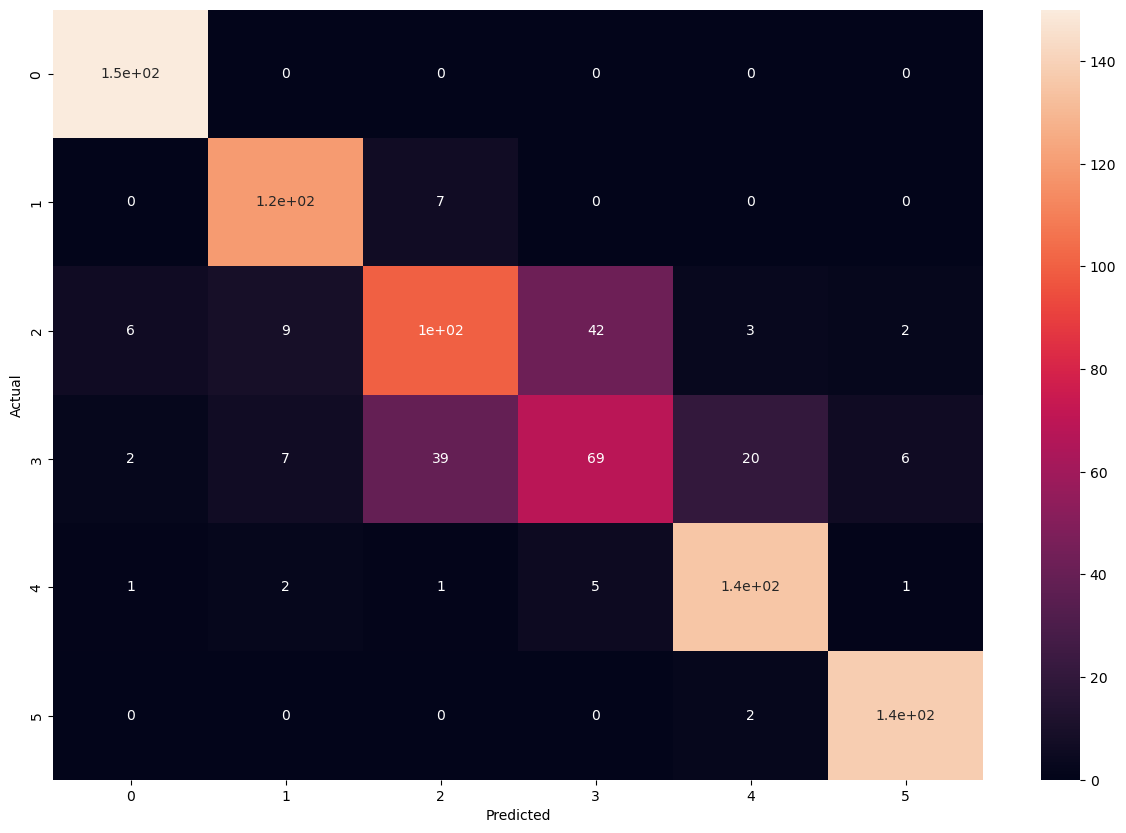

In [24]:
#heatmap for cm
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

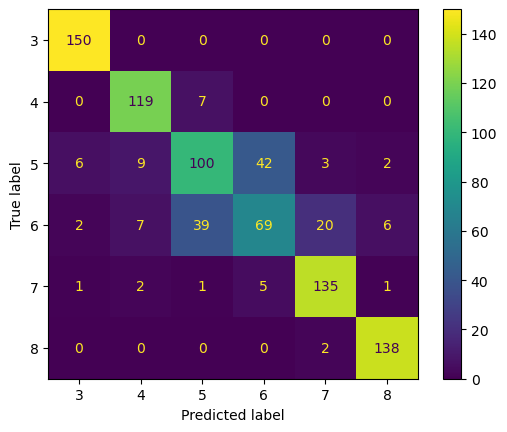

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model_RF.classes_)
cm_display.plot()
plt.show()


In [48]:
# save Random forest model
import pickle
filename = 'finalized_RFmodel.sav'
pickle.dump(model_RF, open(filename, 'wb'))

In [49]:
#save scaler
import pickle
filename = 'scaler_model.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [50]:
import numpy as np
import pickle

# Load saved model and scaler
with open("finalized_RFmodel.sav", "rb") as f:
    model = pickle.load(f)

with open("scaler_model.sav", "rb") as f:
    scaler = pickle.load(f)

# List of feature names in correct order
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# Collect input values from user
print("Enter the following details for prediction:")

user_values = []
for feature in feature_names:
    val = float(input(f"Enter {feature}: "))
    user_values.append(val)

# Convert to array and reshape
input_data = np.array(user_values).reshape(1, -1)

# Scale using the fitted scaler
scaled_data = scaler.transform(input_data)

# Predict
prediction = model.predict(scaled_data)

print(f"\nPredicted Wine Quality: {prediction[0]}")


Enter the following details for prediction:

Predicted Wine Quality: 3
